# **BPL Data Analysis/Visualization/Modeling**

## **Importing Libraries/Dependencies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm

## **Loading the dataset in the notebook**

In [8]:
df = pd.read_csv('/content/premier_league_all_matches.csv')

## **Exploratory Data Analysis (EDA)**

In [9]:
print(df.head())

   Week        Date   Time       Home_Team  Home_xG Score  Away_xG  \
0     1  2022-08-05  20:00  Crystal Palace      1.2   0–2      1.0   
1     1  2022-08-06  12:30          Fulham      1.2   2–2      1.2   
2     1  2022-08-06  15:00       Tottenham      1.5   4–1      0.5   
3     1  2022-08-06  15:00   Newcastle Utd      1.7   2–0      0.3   
4     1  2022-08-06  15:00    Leeds United      0.8   2–1      1.3   

         Away_Team  Attendance                      Venue         Referee  
0          Arsenal     25286.0              Selhurst Park  Anthony Taylor  
1        Liverpool     22207.0             Craven Cottage     Andy Madley  
2      Southampton     61732.0  Tottenham Hotspur Stadium  Andre Marriner  
3  Nott'ham Forest     52245.0             St James' Park    Simon Hooper  
4           Wolves     36347.0                Elland Road    Robert Jones  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Week        1900 non-null   int64  
 1   Date        1900 non-null   object 
 2   Time        1900 non-null   object 
 3   Home_Team   1900 non-null   object 
 4   Home_xG     1900 non-null   float64
 5   Score       1900 non-null   object 
 6   Away_xG     1900 non-null   float64
 7   Away_Team   1900 non-null   object 
 8   Attendance  1459 non-null   float64
 9   Venue       1900 non-null   object 
 10  Referee     1900 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 163.4+ KB
None


In [11]:
print(df.describe())

              Week      Home_xG      Away_xG    Attendance
count  1900.000000  1900.000000  1900.000000   1459.000000
mean     19.500000     1.472895     1.235368  38573.172721
std      10.968743     0.830562     0.753487  16760.722552
min       1.000000     0.000000     0.000000   2000.000000
25%      10.000000     0.800000     0.700000  26771.000000
50%      19.500000     1.400000     1.100000  32458.000000
75%      29.000000     2.000000     1.700000  53174.000000
max      38.000000     5.900000     4.600000  81332.000000


## **Data Cleaning:**

**Checking for missing values**

In [12]:
print(df.isna().sum())

Week            0
Date            0
Time            0
Home_Team       0
Home_xG         0
Score           0
Away_xG         0
Away_Team       0
Attendance    441
Venue           0
Referee         0
dtype: int64


**Removing duplicate values out of the dataset**

In [13]:
df.drop_duplicates(inplace=True)

Droppping rows that have missing values in the attendacne columns, this will be needed, farther down for our Linear Regression Model.

In [65]:
df = df.dropna(subset=['Attendance'])

Preprocessing columns like 'Date' and 'Time' into datetime objects


In [16]:
df['Date'] = pd.to_datetime(df["Date"])

In [17]:
df['Time'] = pd.to_datetime(df["Time"])

## **Data Visualization:**

**Visualizing Home Attendance for each Home team in the BPL, using a bar chart**

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


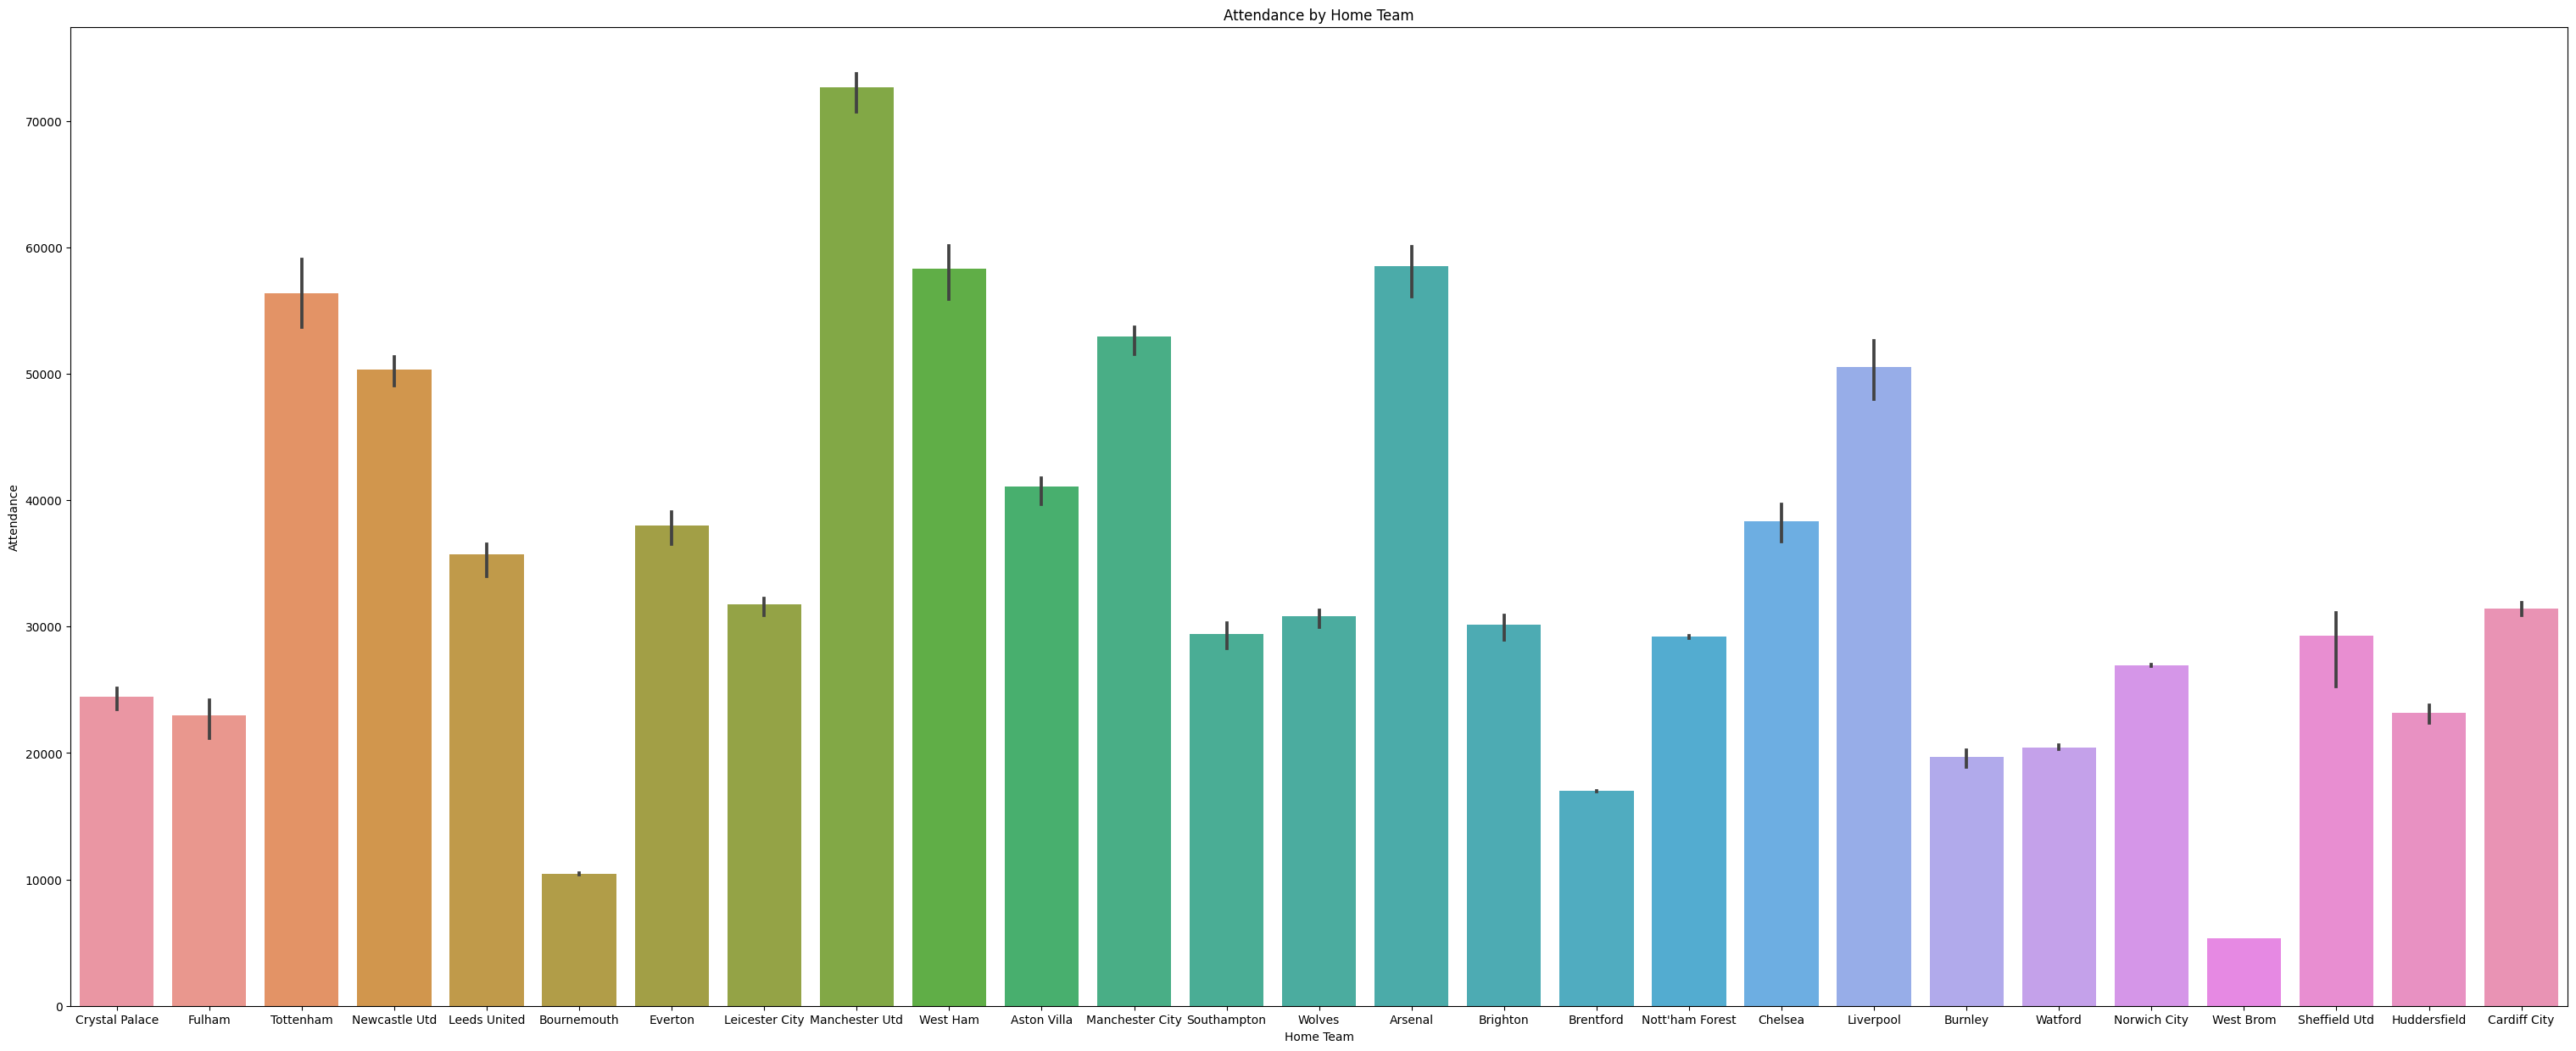

In [26]:
plt.figure(figsize=(38, 15)) #Changes the width and size of the bar chart shown below
sns.barplot(x='Home_Team', y='Attendance', data=df)
plt.xlabel('Home Team')
plt.ylabel('Attendance')
plt.title('Attendance by Home Team')
plt.show()

**Creating a heatmap to visualize the pairwise correlation between the numerical values/features in the dataset provided. Calculating the correlation coefficients between all pairs of numerical columns.**

<ipython-input-29-75ce3afd2873>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


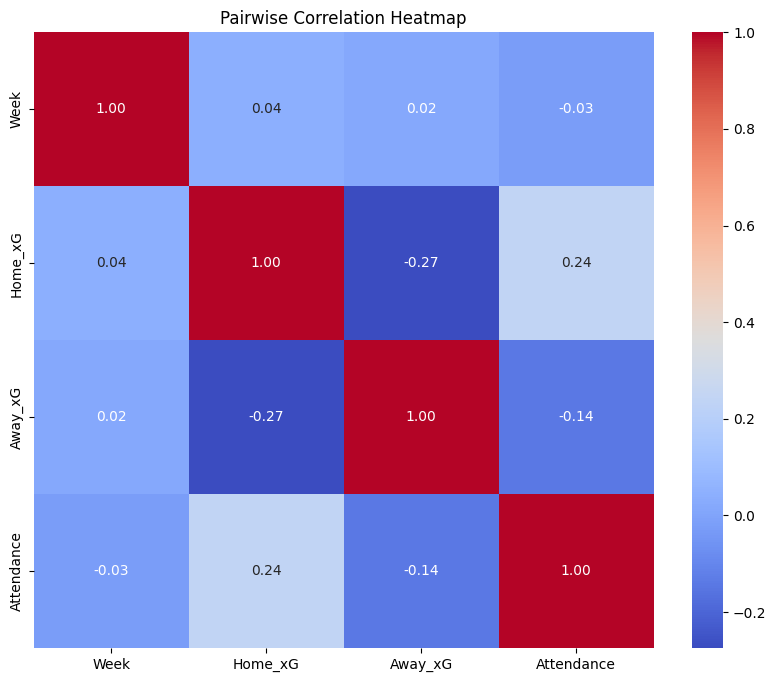

In [29]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Correlation Heatmap')
plt.show()


## **Visualizing the Distribution of Attendance by Venue**

**Using a Boxen plot, an enhanced version of the box plot, which provides us with more information about the tails of the distribution.**

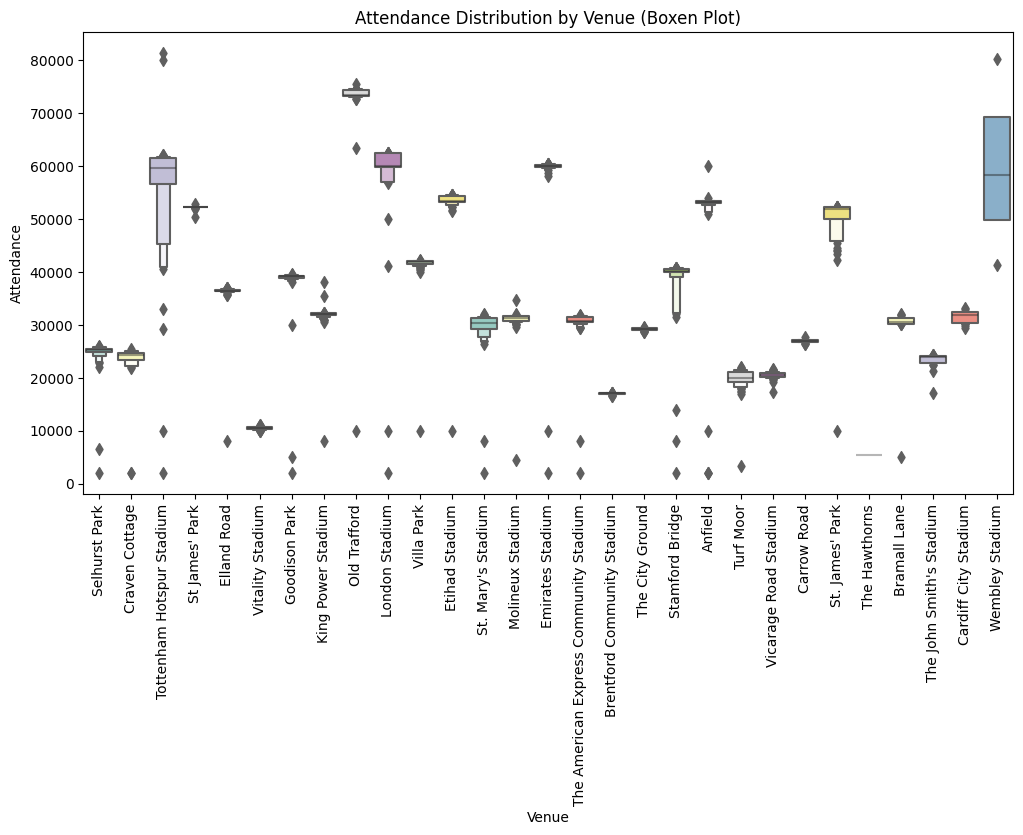

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='Venue', y='Attendance', palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Attendance')
plt.title('Attendance Distribution by Venue (Boxen Plot)')
plt.show()

**Using a strip plot with a violin plot overlay, to show both individual data points and kernel density estimation.**

<ipython-input-37-b279a85cb30f>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Venue', y='Attendance', palette='Set3', size=6, jitter=True)


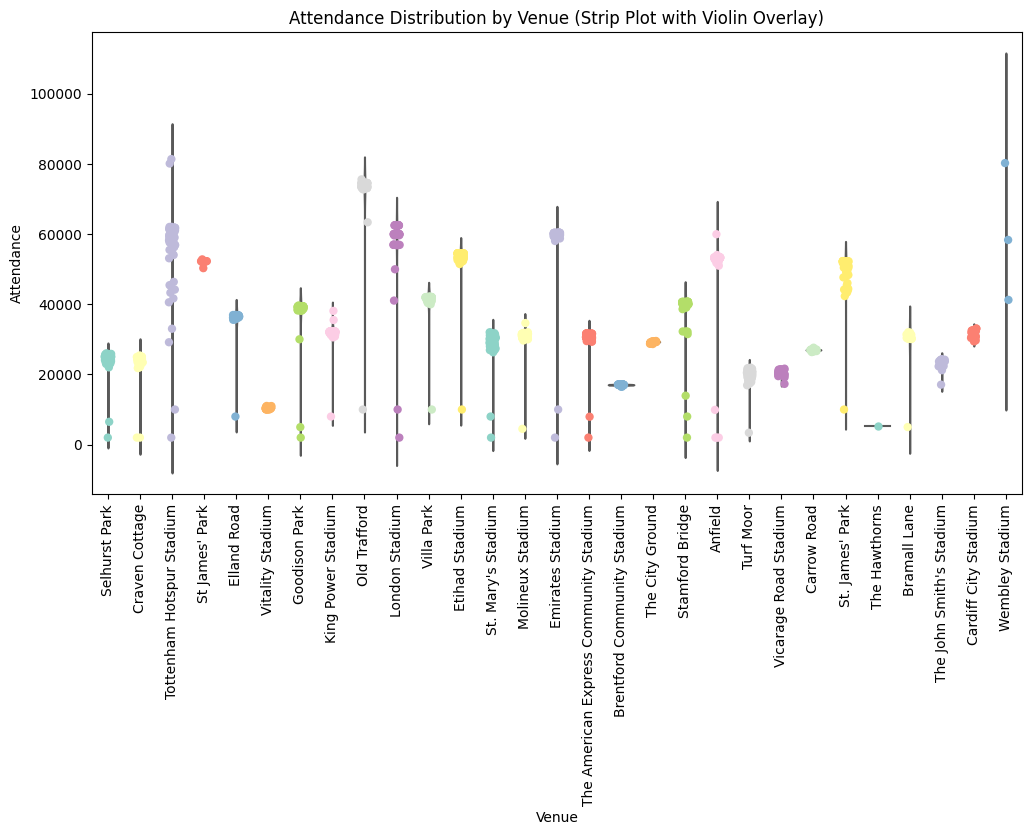

In [37]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Venue', y='Attendance', palette='Set3', size=6, jitter=True)
sns.violinplot(data=df, x='Venue', y='Attendance', palette='Set2', inner='quartile')
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Attendance')
plt.title('Attendance Distribution by Venue (Strip Plot with Violin Overlay)')
plt.show()

**Box Plot Visualization for Attendance, showing average game attendance by venue**

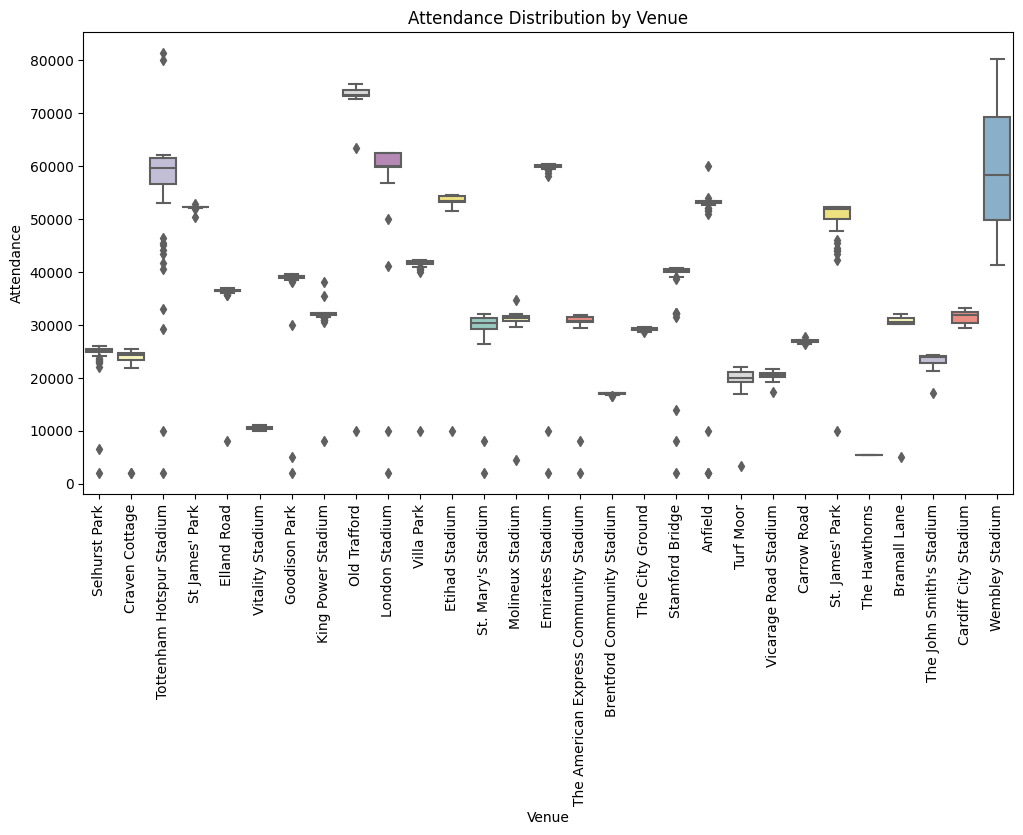

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Venue', y='Attendance', palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Attendance')
plt.title('Attendance Distribution by Venue')
plt.show()

**Swarmplot Visualization, displaying individual data points without overlap, slightly jittering the points around the categorical axis. Allowing us to see the distribution of attendance values for each venue**

<ipython-input-40-66b26abedef4>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Venue', y='Attendance', palette='Set3', size=6)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size 

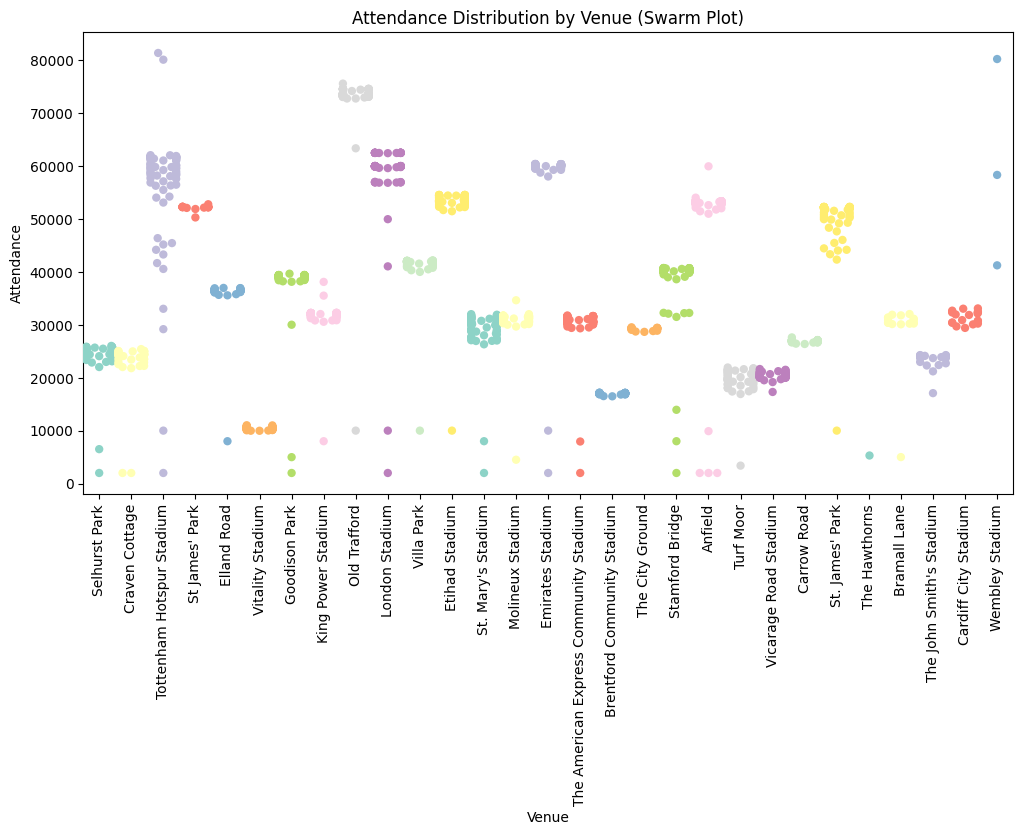

In [40]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Venue', y='Attendance', palette='Set3', size=6)
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Attendance')
plt.title('Attendance Distribution by Venue (Swarm Plot)')
plt.show()

## **Implementation of Machine Learning Techniques/Algorithims**

Built a **random forest classifier** to predict Match Outcomes, based on the Dataset Features like ('Home_xG', 'Away_xG', 'Score')

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparing the data
X = df[['Home_xG', 'Away_xG']]
y = df['Score']  # Replace 'MatchOutcome' with your actual target column

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating & Training the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making the predictions
y_pred = clf.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.12631578947368421
Classification Report:
               precision    recall  f1-score   support

         0–0       0.22      0.19      0.21        31
         0–1       0.20      0.21      0.21        33
         0–2       0.06      0.05      0.05        21
         0–3       0.11      0.17      0.13        12
         0–4       0.00      0.00      0.00         2
         0–5       0.00      0.00      0.00         1
         1–0       0.11      0.13      0.12        30
         1–1       0.17      0.19      0.18        42
         1–2       0.05      0.04      0.04        25
         1–3       0.00      0.00      0.00        13
         1–4       0.20      0.40      0.27         5
         1–5       0.00      0.00      0.00         2
         1–6       0.00      0.00      0.00         1
         2–0       0.23      0.21      0.22        33
         2–1       0.14      0.12      0.13        34
         2–2       0.18      0.15      0.17        13
         2–3       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

The accuracy is not amazing. Let's improve the accuracy, let's implememnt hyperparamter tuning, to help our model perform better.

In [61]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best parameters and estimators
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Making predictions with best estimator
y_pred = best_estimator.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy with Tuned Model: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy with Tuned Model: 0.12631578947368421


**Building a Linear Regression Model for Attendance Prediction**

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Prepping the data
X = df[['Home_xG', 'Away_xG']]
y = df["Attendance"]

#Splitting the data into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Creating and Testing the Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

#Making Predictions
y_pred = reg.predict(X_test)

#Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 263279422.78628233
R-squared: 0.037471648502168


Implementing K-Means, an unsupervised ML algorithim that will aim to partition our dataset into distinct, non-overlapping groups/clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


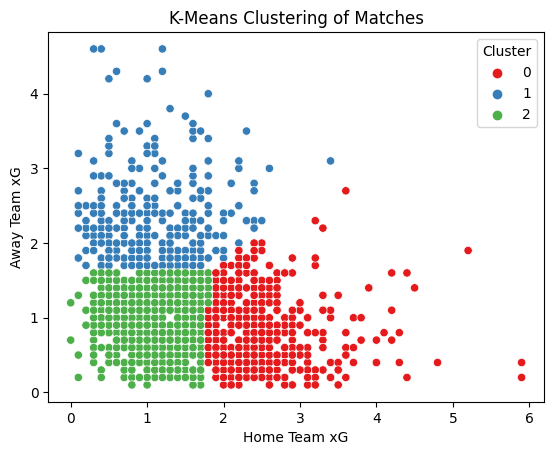

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparing and scaling the data
X = df[['Home_xG', 'Away_xG']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
sns.scatterplot(data=df, x='Home_xG', y='Away_xG', hue='Cluster', palette='Set1')
plt.xlabel('Home Team xG')
plt.ylabel('Away Team xG')
plt.title('K-Means Clustering of Matches')
plt.show()

## **Conclusion**

- In this data analysis notebook, I embarked on a  journey through the world of BPL match data. Leveraging a rich dataset encompassing match statistics, scores, attendance, and more, i explored a variety of data analysis and visualization techniques to gain valuable insights into the beautiful game. Here are the key takeaways from my analysis:

### **Data Overview:**
- This dataset included essential match-related information such as the date, teams, expected goals (xG) for both home and away teams, scores, attendance, venue, and even the referees.

### **Data Cleaning and Preprocessing:**
- The data cleaning process was instrumental in preparing my dataset for the analysis. I addressed missing values, ensuring that my analyses was based on complete and accurate information.

- I identified and handled outliers to prevent them from skewing my results. Data preprocessing techniques were applied to maintain the integrity of my analyses.

### **Exploratory Data Analysis (EDA):**
- I performed exploratory data analysis (EDA) to understand the distribution and characteristics of my dataset.

### **Data Visualization:**
- I employed data visualization techniques to create informative plots and charts, enhancing my understanding of the dataset.

- Seaborn and Matplotlib were the trusted dependencies for crafting visually appealing representations of match statistics, attendance trends, and correlations among variables.

### **Machine Learning Modeling/Techniques:**
- I delved into machine learning techniques to predict match outcomes and attendance. Random Forest regression and Linear Regression models were utilized for these tasks.

- The Random Forest model yielded an accuracy of [0.13], and the Linear Regression model produced a Mean Squared Error (MSE) of [263279422.78628233] and an R-squared of [0.037471648502168]. Further model & data refinement will be needed for more accurate predictions.


### **Clustering:**
- K-Means clustering was applied to group similar matches based on expected goals (xG). The resulting clusters shed light on different styles of play and match outcomes.

### **Future Directions:**

- Future work may involve incorporating additional data sources, such as player statistics, and applying advanced machine learning models or deep learning techniques for more accurate predictions.

### **In conclusion:**
- This data analysis journey has covered various facets of football matches, from the dynamics of gameplay to the factors influencing match attendance. These insights can inform strategic decisions for teams, venues, and fans alike.